In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapvenha3/tien/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 661 images belonging to 11 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapvenha3/tien/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 110 images belonging to 11 classes.


In [ ]:
training_data.class_indices

{'1000': 0,
 '100k': 1,
 '10k': 2,
 '200': 3,
 '2000': 4,
 '200k': 5,
 '20k': 6,
 '500': 7,
 '5000': 8,
 '500k': 9,
 '50k': 10}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(training_data,epochs=500,batch_size=100,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
21/21 [==============================] - 444s 21s/step - loss: 3.5446 - accuracy: 0.0893 - val_loss: 2.4215 - val_accuracy: 0.0909
Epoch 2/500
21/21 [==============================] - 30s 1s/step - loss: 2.4031 - accuracy: 0.0908 - val_loss: 2.3921 - val_accuracy: 0.1364
Epoch 3/500
21/21 [==============================] - 30s 1s/step - loss: 2.3924 - accuracy: 0.1225 - val_loss: 2.3832 - val_accuracy: 0.1364
Epoch 4/500
21/21 [==============================] - 30s 1s/step - loss: 2.3813 - accuracy: 0.1452 - val_loss: 2.3565 - val_accuracy: 0.1636
Epoch 5/500
21/21 [==============================] - 30s 1s/step - loss: 2.3067 - accuracy: 0.1815 - val_loss: 2.2399 - val_accuracy: 0.1545
Epoch 6/500
21/21 [==============================] - 30s 1s/step - loss: 2.2209 - accuracy: 0.2088 - val_loss: 2.1544 - val_accuracy: 0.1727
Epoch 7/500
21/21 [==============================] - 30s 1s/step - loss: 2.1014 - accuracy: 0.2360 - val_loss: 2.0710 - val_accuracy: 0.2636
Epoch 8/500

<function matplotlib.pyplot.show>

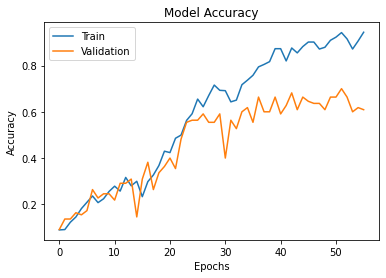

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhan_dien_tien.h5")

In [ ]:
model_nhandien=load_model('Nhan_dien_tien.h5')

500


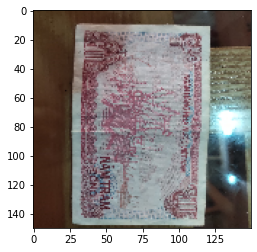

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/tien/test/500.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='100k'
if round(result[0][2])==1:
  prediction='10k'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='200k'
if round(result[0][6])==1:
  prediction='20k'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='500k'
if round(result[0][10])==1:
  prediction='50k'
print(prediction)

5000


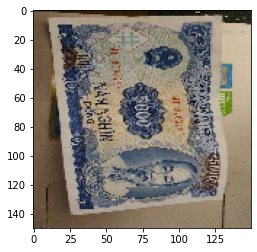

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/tien/test/5k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='100k'
if round(result[0][2])==1:
  prediction='10k'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='200k'
if round(result[0][6])==1:
  prediction='20k'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='500k'
if round(result[0][10])==1:
  prediction='50k'
print(prediction)

20k


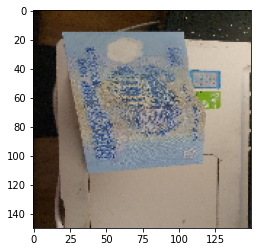

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/tien/test/20k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='100k'
if round(result[0][2])==1:
  prediction='10k'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='200k'
if round(result[0][6])==1:
  prediction='20k'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='500k'
if round(result[0][10])==1:
  prediction='50k'
print(prediction)